In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt, fabs

In [118]:
df = pd.read_csv("laba1_2.csv", sep=';')

In [119]:
df

,theta,number_channel
0,0,864
1,10,832
2,20,793
3,30,725
4,40,662
5,50,594
6,60,520
7,70,463
8,80,416
9,90,372


In [120]:
theta = np.array(df['theta'])
number_channel = np.array(df['number_channel'])

In [121]:
theta = 0.0174533 * theta

In [122]:
number_channel.shape

(13,)

In [123]:
ox = 1 - np.cos(theta)

In [124]:
oy = 1 / number_channel

In [125]:
ox 

array([0.        , 0.01519226, 0.06030743, 0.13397471, 0.23395575,
       0.35721268, 0.50000039, 0.65798035, 0.82635241, 1.00000067,
       1.17364891, 1.34202092, 1.50000078])

In [126]:
oy

array([0.00115741, 0.00120192, 0.00126103, 0.00137931, 0.00151057,
       0.0016835 , 0.00192308, 0.00215983, 0.00240385, 0.00268817,
       0.00286533, 0.00322581, 0.0035461 ])

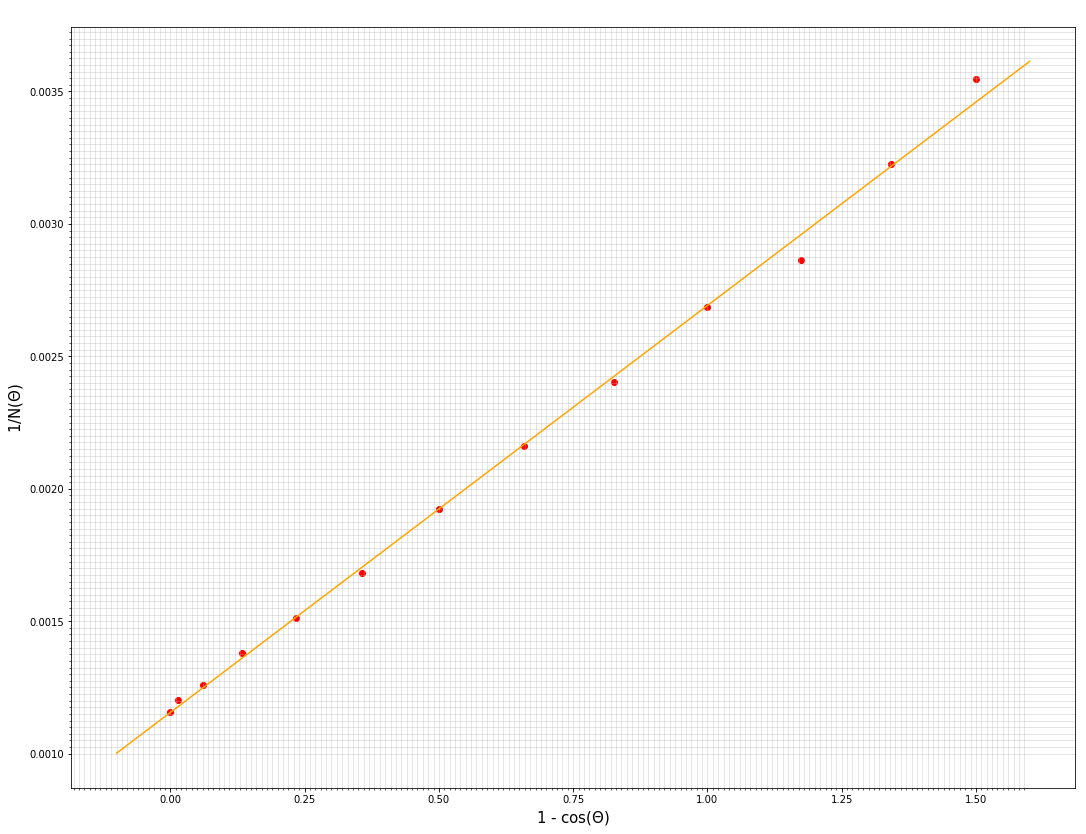

In [157]:
fig = plt.figure(figsize=(18, 14)); 
ax = fig.gca()
ax.set_xticks(np.arange(-0.2, 1.6, 0.01), minor=True) # это для мелких делений по оси ОХ
ax.set_yticks(np.arange(0.001, 0.004, 0.000025), minor=True) # аналогично для OY
ax.grid(which='minor', alpha=0.4, linestyle='-')

plt.title(' ', fontsize=18); 
# plt.grid(ls='-')

# plt.plot(ox, oy, lw=2, label='Длина волны', color='black')
mnk_coef = np.polyfit(ox, oy, 1) # считаем коэфф-ты аппроксимирующей прямой
xp = np.linspace(-0.1, 1.6, 100)
p = np.poly1d(mnk_coef) # создаем полином с коэффициентами (убывающими по степени) из массива mnk_coef_f1
_ = plt.plot(xp, p(xp), color='orange') # рисуем точки и аппроксимирующую прямую

plt.xlabel('1 - cos($\Theta$)', fontsize=15); 
plt.ylabel('1/N($\Theta$)', fontsize=15)
plt.scatter(ox, oy, color='red')

# plt.errorbar(ox, oy, xerr=sigma_k, yerr=sigma_c, fmt='o', color='grey')
plt.show()

In [134]:
# Ниже реализованы функции, которые считают погрешности для коэффициентов k и с, 
# найденных с помощью метода наименьших квадратов (y = kx + c)
# rmse означает root mean square error
def get_rmse_k(x, y, k, n):
    return  sqrt(fabs(((np.mean(y ** 2) - ((np.mean(y)) ** 2)) /
                 ((np.mean(x ** 2) - 
                   ((np.mean(x)) ** 2)))) - (k ** 2))) / sqrt(n)

def get_rmse_c(x, y, sigma_k, n):
    return sigma_k * sqrt(np.mean(x ** 2) - ((np.mean(x)) ** 2))

In [135]:
mnk_coef[0]

0.00010912671483484796

In [136]:
sigma_k = get_rmse_k(ox, oy, mnk_coef[0], 13)
sigma_c = get_rmse_c(ox, oy, sigma_k, 13)

In [140]:
sigma_k, sigma_c

(0.00042555284974888356, 0.00021497949499402268)